In [1]:
from tifffile import imread
from tifffile import imwrite
from tifffile import TiffFile
from multiprocessing import Pool

import matplotlib.pyplot as plt
import yaml
import numpy as np
from pathlib import Path
from skimage.color import rgb2gray
from skimage.transform import rescale
from skimage import restoration

In [2]:
rawPath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/images/D3.raw.tiff"

raw = imread(rawPath)
print(f"{raw.shape=}")

TiffFrame 216: missing required tags
OME series: expected 216 frames, got 217


raw.shape=(3, 72, 2168, 2995, 3)


In [3]:
prepPath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/images/D3.prepared.tiff"
prep = imread(prepPath)
print(f"{prep.shape=}")

prep.shape=(3, 72, 1084, 1498)


In [4]:
prepPath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/images/D3.prepared.tiff"
prep = imread(prepPath)
print(f"{prep.shape=}")

procPath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/images/D3.processed.tiff"
proc = imread(procPath)
print(f"{proc.shape=}")

segPath = "/scratch/indikar_root/indikar1/cstansbu/pf-test/images/D3.segmented.tiff"
seg = imread(segPath)
print(f"{seg.shape=}")

prep.shape=(3, 72, 1084, 1498)
proc.shape=(3, 72, 1084, 1498)
seg.shape=(72, 1084, 1498)


rawT.mean()=75.20483842484502 rawT.max()=254 rawT.min()=0
prepT.mean()=154.5741166573882 prepT.max()=255 prepT.min()=0
procT.mean()=3.0987811547007325 procT.max()=255 procT.min()=0


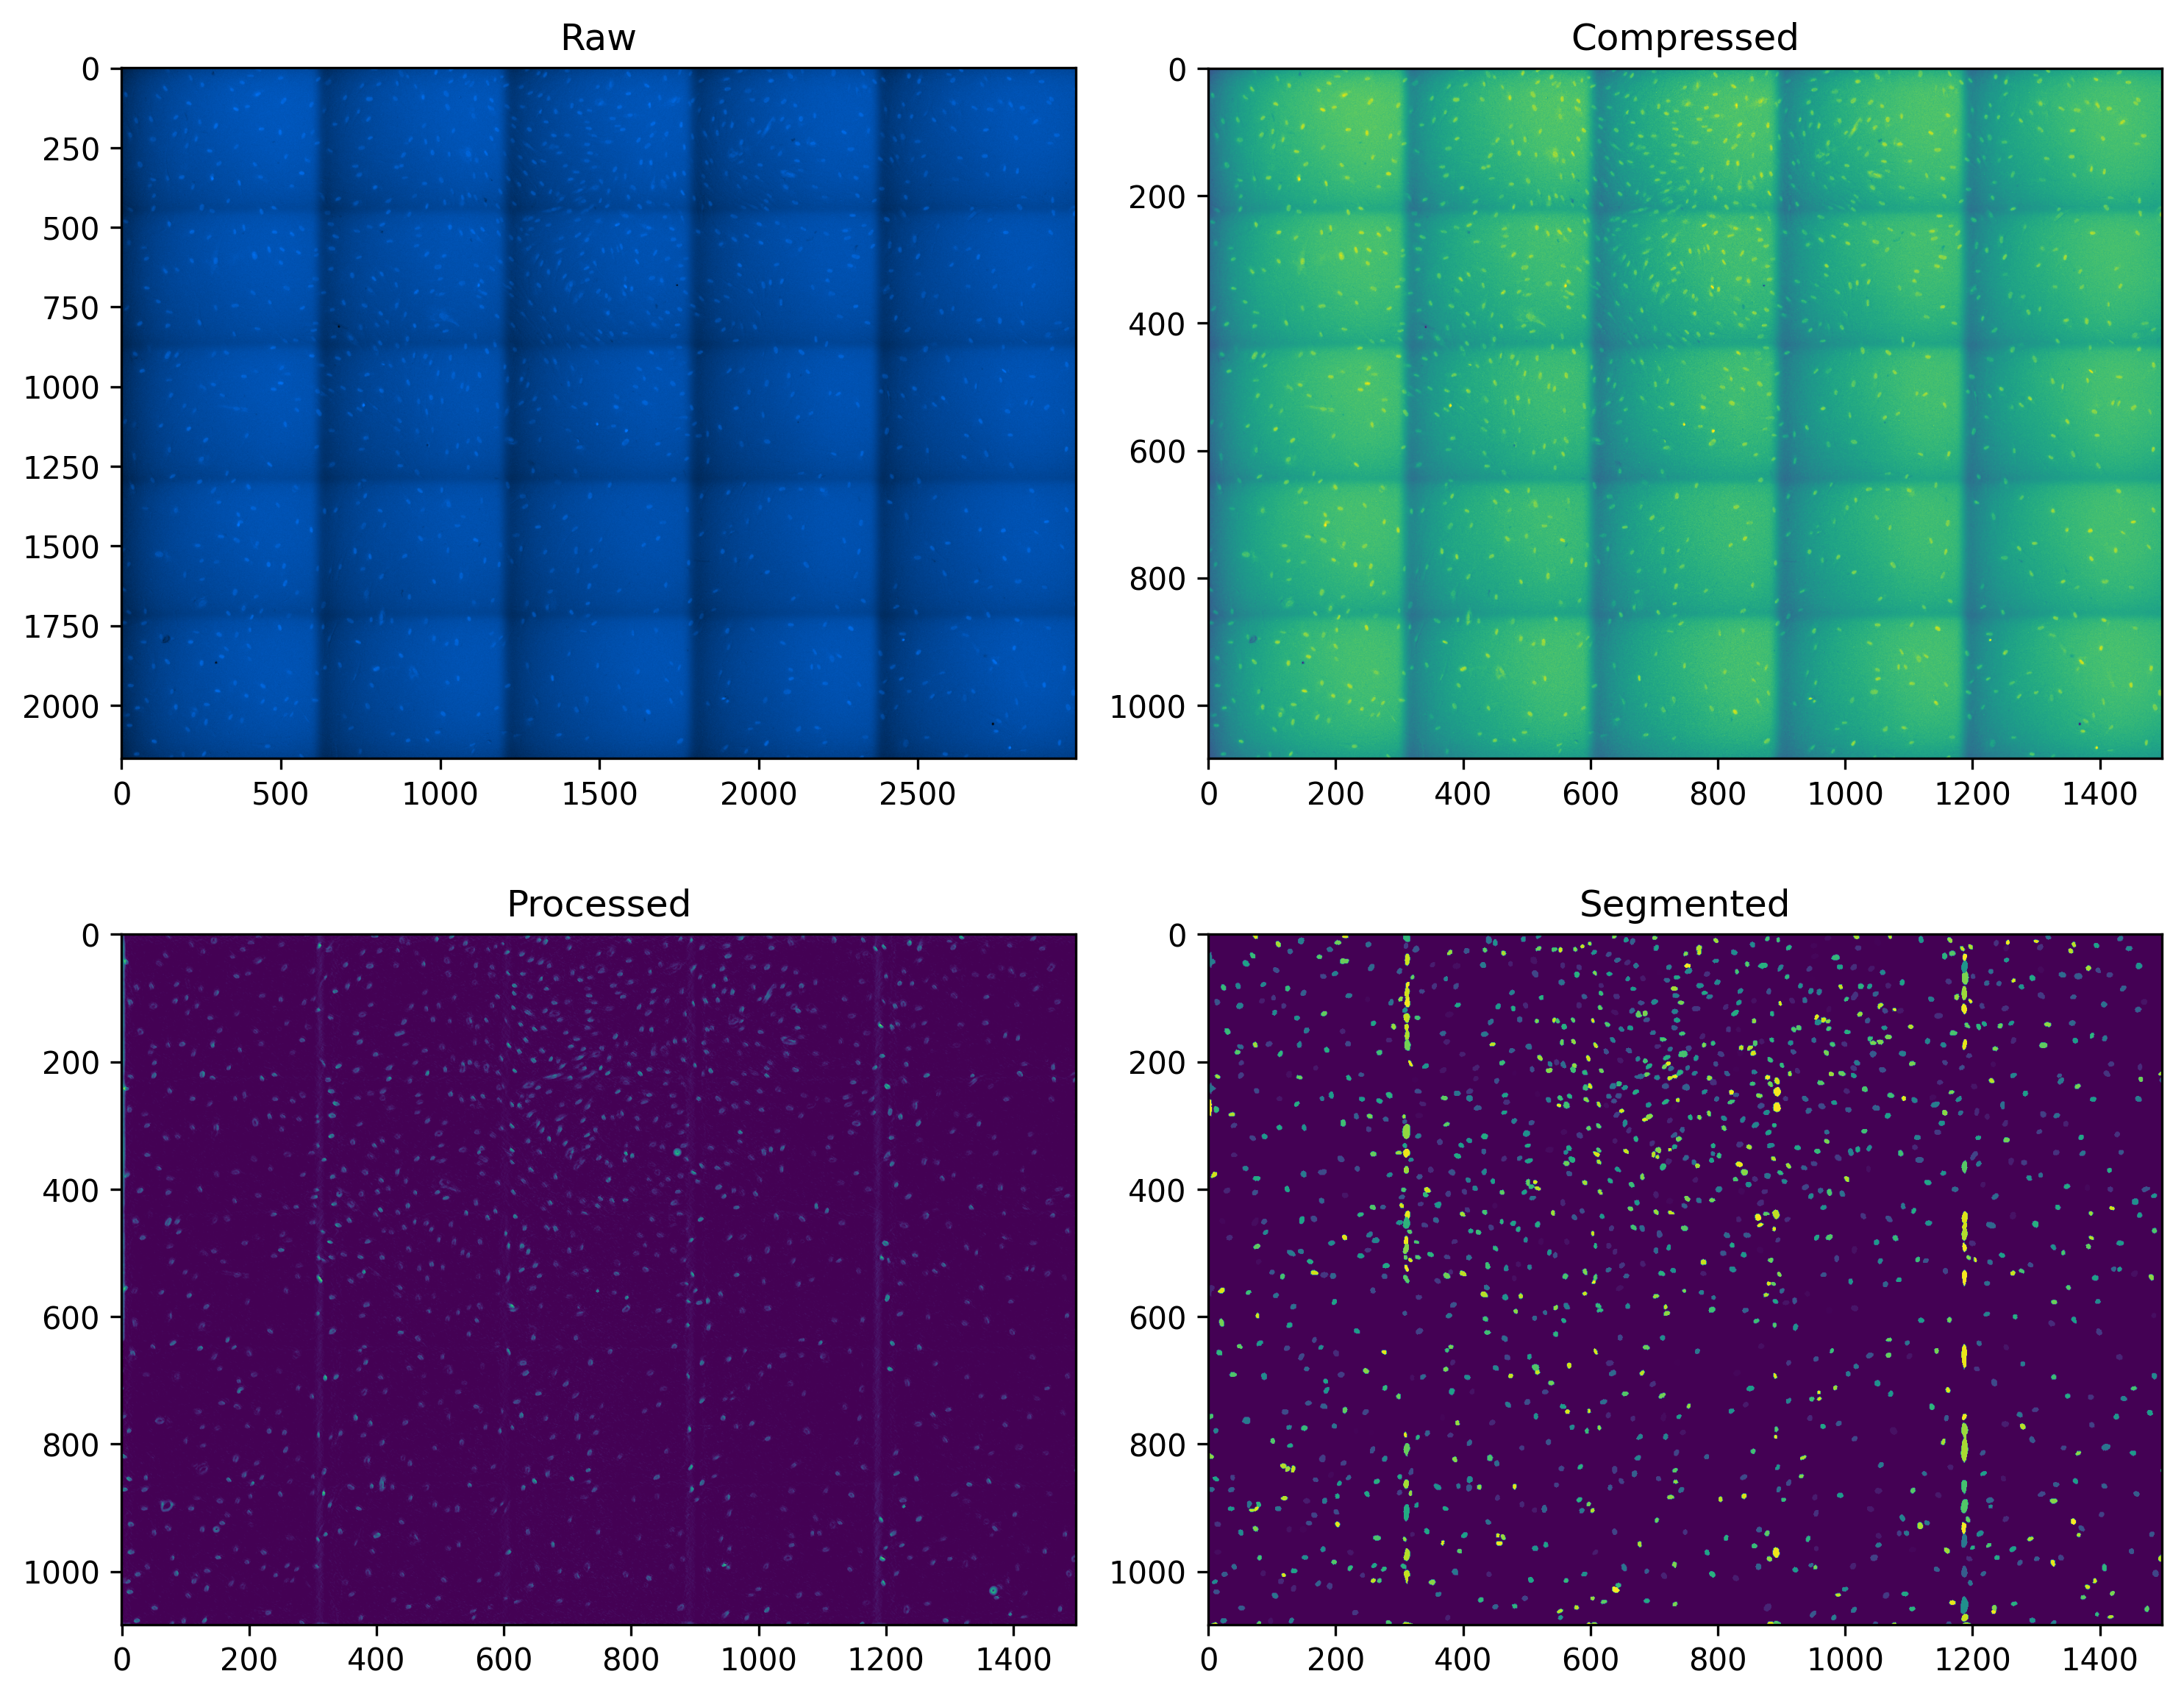

In [9]:
t = 2
c = 1

rawT = raw[c, t, :, :, :]
prepT = prep[c, t, :, :,]
procT = proc[c, t, :, :,]
segT = seg[t, :, :,]

print(f"{rawT.mean()=} {rawT.max()=} {rawT.min()=}")
print(f"{prepT.mean()=} {prepT.max()=} {prepT.min()=}")
print(f"{procT.mean()=} {procT.max()=} {procT.min()=}")

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 10, 8

fig, axs = plt.subplots(2, 2)
axs = axs.ravel()

axs[0].imshow(rawT)
axs[0].set_title("Raw")

axs[1].imshow(prepT)
axs[1].set_title("Compressed")

axs[2].imshow(procT)
axs[2].set_title("Processed")

axs[3].imshow(segT)
axs[3].set_title("Segmented")

plt.tight_layout()


In [6]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

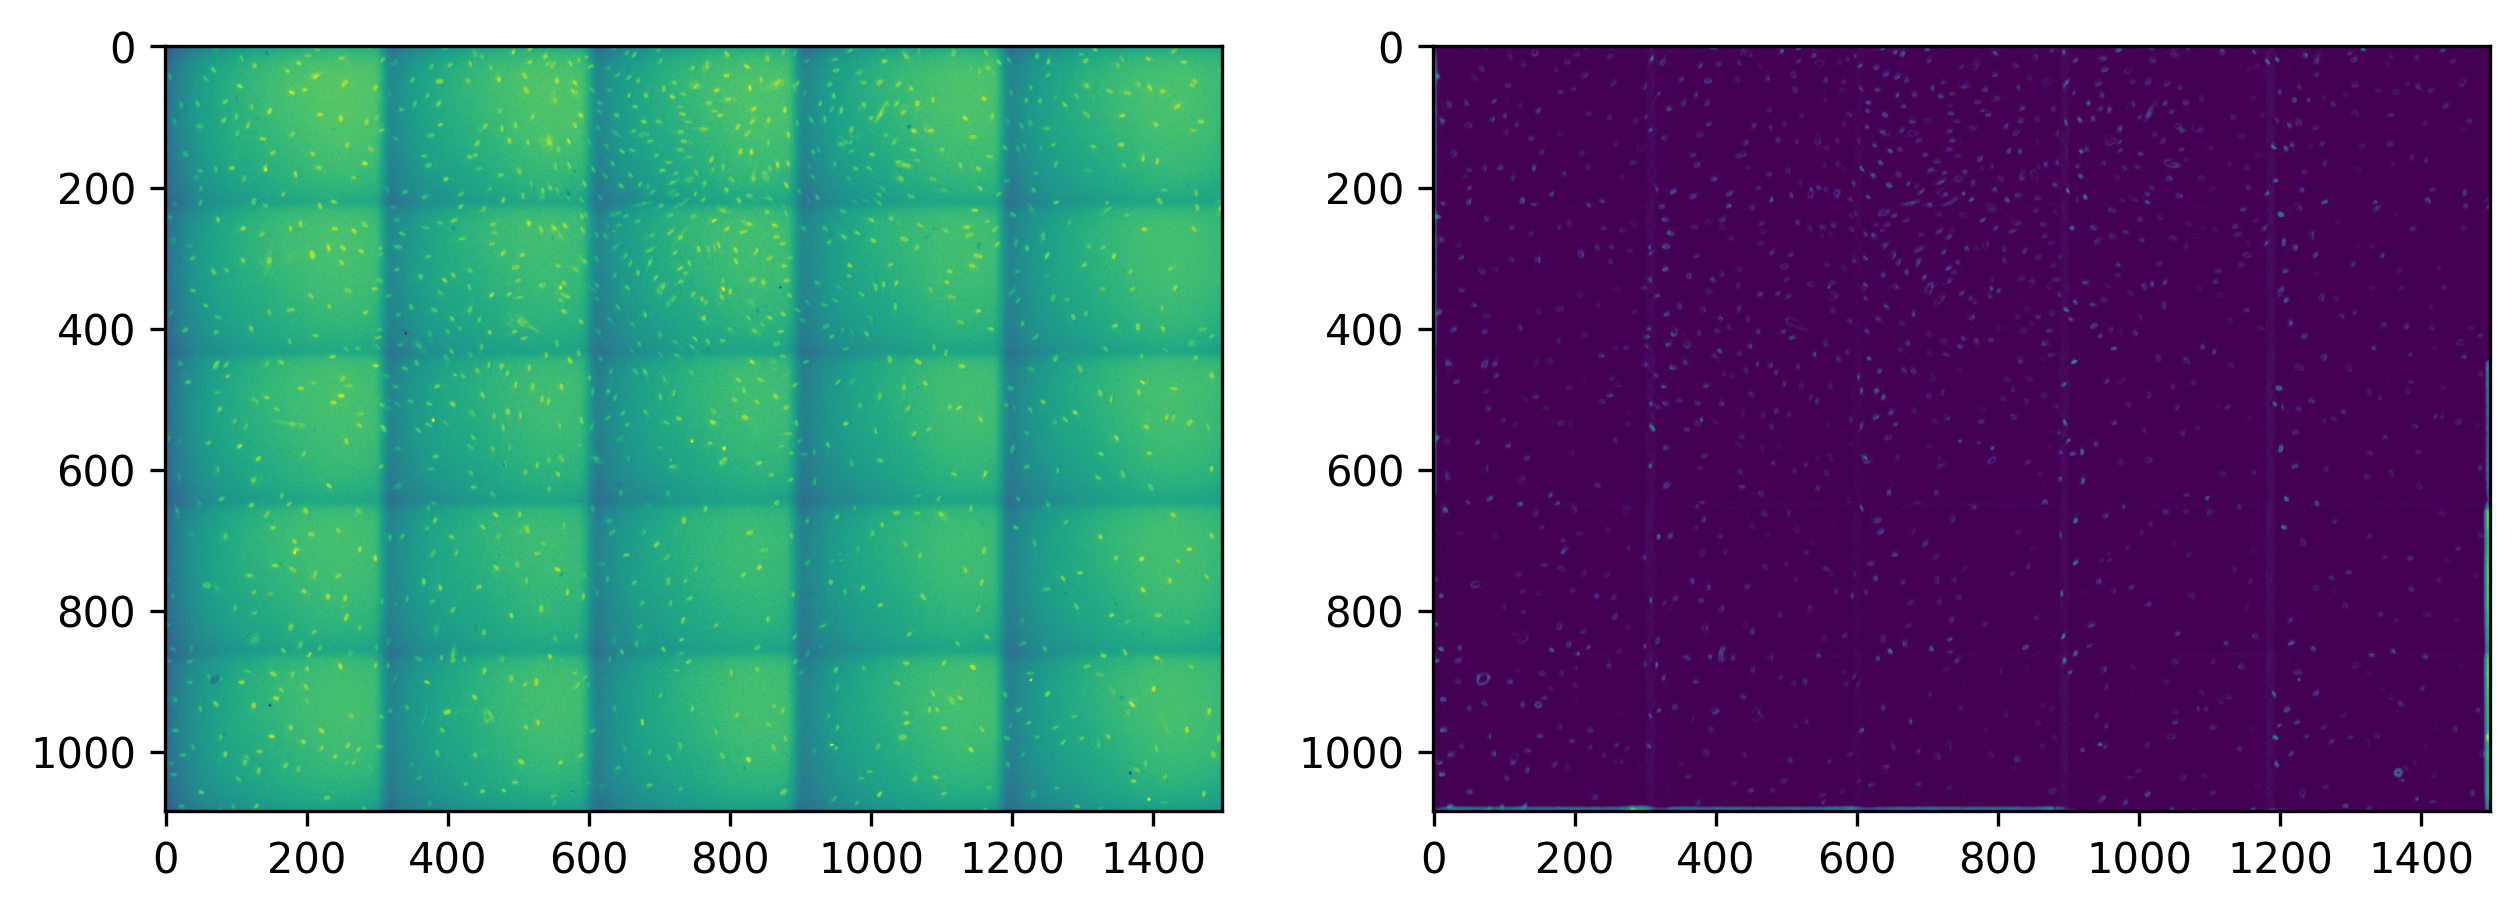

In [24]:
from skimage.exposure import equalize_adapthist
from skimage.filters import median

n = 20
r = 60

t = prepT.copy()
# t = restoration.denoise_bilateral(t)
t = median(t, np.ones((3, 3)))
t = equalize_adapthist(t, (n, n))
t = restoration.denoise_bilateral(t)
background = restoration.rolling_ball(t, radius=r)
t = t - background


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 10, 5

fig, axs = plt.subplots(1, 2)
axs = axs.ravel()

axs[0].imshow(prepT)
axs[1].imshow(t)


In [ ]:
break

In [ ]:
int(np.min(procT.shape) * 0.075)

In [ ]:
prepT.max()

In [ ]:
break

In [ ]:
configPath = "../config/config.yaml"
config = yaml.safe_load(Path(configPath).read_text())
config

In [ ]:

# build the worker pool
workers = 8
pool = Pool(workers) # important when running on OnDemand



def flattenRGB(img):
    """A function to get a luminosity image from 3-channel RGB"""
    return rgb2gray(img)
    

def rescaleSlice(img, scale_factor):
    """A function to rescale a single grey scale slice
    based on the scale factor applied to XY.
    
    NOTE: this is for a slice, we shouldn't downsample the 
    separate channels in position [0] of img.shape
    """
    return rescale(img, (1, scale_factor, scale_factor), anti_aliasing=False)

def prepareImage(img_t, config, t):
    """A function to prepare the image for downstream preprocessing 

    Notes: 
        - time is assumed the second dimension
        - works on a single image at a time
    """
    scaleFactor = config['prepare']['rescale_factor']
    img_t = flattenRGB(img_t)
    img_t = rescaleSlice(img_t, scaleFactor)
    return [t, img_t]

def getInputs(img, config):
    """A function to prepare images for multiprocessing """
    # time = img.shape[1]
    time = 5
    args = []
    for t in range(time):
        img_t = img[:, t, :, :, :]
        tup = (img_t, config.copy(), t)
        args.append(tup)
    return args

args = getInputs(img, config)
L = pool.starmap(prepareImage, args)
print('done')

In [ ]:
L.sort()
L[2]

In [ ]:
# outpath = "/nfs/turbo/umms-indikar/shared/projects/wound_healing/data/test/A3Test2.tiff"
# imwrite(outpath, img[:, 0:30, :, :, :])
# print('done')

In [ ]:
img = imread(outpath, is_ome=True)
print(f"{img.shape=}")

In [ ]:
from tifffile import TiffFile

In [ ]:
t = TiffFile(fpath, is_ome=True)
